# Análisis de ventas online

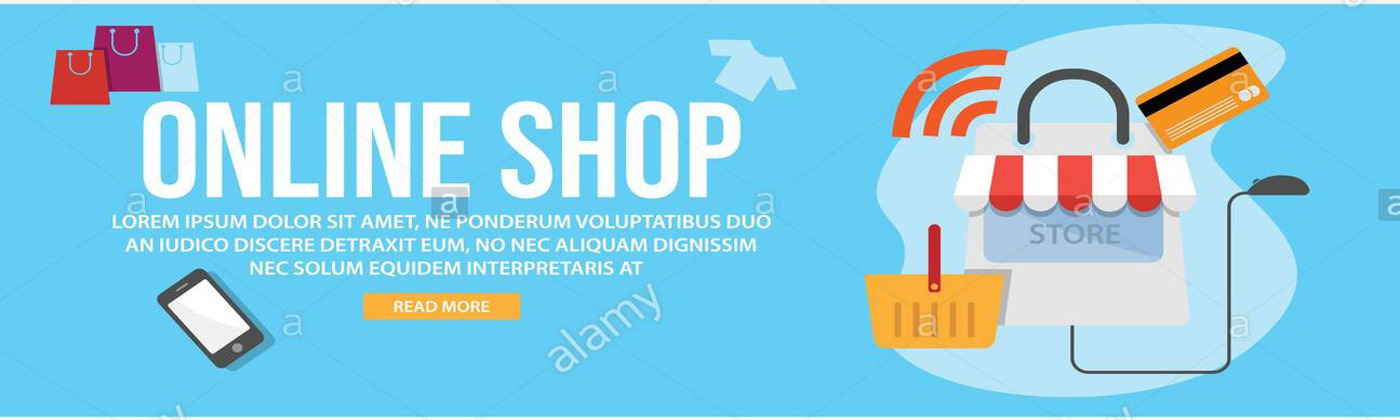

In [33]:
from PIL import Image
i = Image.open("imagen/shop.jpg")
width, height = i.size
i = i.resize((1400,420))
display(i)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

In [2]:
df_customer = pd.read_csv('dataset/Ecommerce Customers.csv')
df_customer.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)

In [3]:
df_customer[:5]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
train = df_customer.drop(columns=['Yearly Amount Spent'])
test = df_customer['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

In [5]:
print('Min:', df_customer['Yearly Amount Spent'].min())
print('Max:', df_customer['Yearly Amount Spent'].max())

Min: 256.67058229005585
Max: 765.5184619388373


In [6]:
svr_1 = SVR()

svr_1.fit(X_train, y_train)
train_preds = svr_1.predict(X_train)
test_preds = svr_1.predict(X_test)
print('MAE in train:', mean_absolute_error(train_preds, y_train))
print('MSE in train:', np.sqrt(mean_squared_error(train_preds, y_train)))
print('MAE in test:', mean_absolute_error(test_preds, y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(test_preds, y_test)))

MAE in train: 61.97191367544774
MSE in train: 80.0771610245706
MAE in test: 58.08249809822583
RMSE in test: 71.77340675782551


In [7]:
svr_2 = SVR(kernel='linear', C=10, cache_size=800, )

svr_2.fit(X_train, y_train)
train_preds = svr_2.predict(X_train)
test_preds = svr_2.predict(X_test)
print('MAE in train:', mean_absolute_error(train_preds, y_train))
print('MSE in train:', np.sqrt(mean_squared_error(train_preds, y_train)))
print('MAE in test:', mean_absolute_error(test_preds, y_test))
print('RMSE in test:', np.sqrt(mean_squared_error(test_preds, y_test)))

MAE in train: 7.597337460667834
MSE in train: 9.709093612378334
MAE in test: 9.062395385232243
RMSE in test: 10.866491165936116


In [8]:
pd.DataFrame(svr_2.coef_, columns=X_train.columns).T

,0
Avg. Session Length,25.727554
Time on App,38.168471
Time on Website,0.258074
Length of Membership,62.007621


In [9]:
SVC?

(array([  7.,  14.,  42.,  86., 137., 116.,  63.,  23.,   9.,   3.]),
 array([256.67058229, 307.55537025, 358.44015822, 409.32494618,
        460.20973415, 511.09452211, 561.97931008, 612.86409804,
        663.74888601, 714.63367397, 765.51846194]),
 <BarContainer object of 10 artists>)

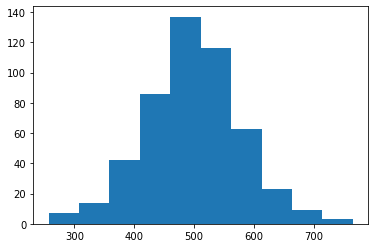

In [10]:
plt.hist(df_customer['Yearly Amount Spent'])

In [12]:
def money_spent_categorizer(money):
    if money < 460:
        return 0 #soft buyer
    elif money >=460 and money <=540:
        return 1 #medium buyer
    else:
        return 2 #heavy buyer
    
df_customer['buyer_type'] = df_customer.apply(lambda x: money_spent_categorizer(x['Yearly Amount Spent']), axis=1)

In [13]:
train = df_customer.drop(columns=['Yearly Amount Spent', 'buyer_type'])
test = df_customer['buyer_type']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)

In [14]:
#instance
svc_1 = SVC()

#train
svc_1.fit(X_train, y_train)

#train preds
preds_train = svc_1.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[  0   0   0]
 [116 167 115]
 [  0   0   2]]

F1 SCORE:
 0.4225

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.42      0.59       398
           2       0.02      1.00      0.03         2

    accuracy                           0.42       400
   macro avg       0.34      0.47      0.21       400
weighted avg       1.00      0.42      0.59       400



C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#Classification in test
preds_trest = svc_1.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[ 0  0  0]
 [32 37 31]
 [ 0  0  0]]

F1 SCORE:
 0.37

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.37      0.54       100
           2       0.00      0.00      0.00         0

    accuracy                           0.37       100
   macro avg       0.33      0.12      0.18       100
weighted avg       1.00      0.37      0.54       100



C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#instance
svc_2 = SVC(kernel='rbf', class_weight='balanced', decision_function_shape='ovo', C=1.2, gamma=0.1, probability=True)

#train
svc_2.fit(X_train, y_train)

#train preds
preds_train = svc_2.predict(X_train)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[112   7   0]
 [  4 148   3]
 [  0  12 114]]

F1 SCORE:
 0.935

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       119
           1       0.89      0.95      0.92       155
           2       0.97      0.90      0.94       126

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.94       400
weighted avg       0.94      0.94      0.94       400



In [17]:
#Classification in test
preds_trest = svc_2.predict(X_test)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test, average='micro'))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[32  2  0]
 [ 0 34  3]
 [ 0  1 28]]

F1 SCORE:
 0.94

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.92      0.92      0.92        37
           2       0.90      0.97      0.93        29

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [18]:
X_test_prob = X_test.copy()
X_test_prob.reset_index(drop=True, inplace=True)
probs = pd.DataFrame(svc_2.predict_proba(X_test), columns=[0,1,2]).round(2)
X_test_prob.merge(probs, left_index=True, right_index=True)[:20]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,0,1,2
0,33.785207,13.039511,36.312727,2.018195,0.67,0.31,0.02
1,34.370327,11.887800,37.861447,3.046620,0.00,0.99,0.01
2,34.568681,11.378087,38.304471,3.784932,0.01,0.83,0.16
3,32.319858,12.418113,36.155336,3.222081,0.08,0.92,0.00
4,31.904857,12.227728,36.985913,3.771420,0.00,1.00,0.00
5,32.295248,11.031358,38.252978,3.107469,1.00,0.00,0.00
6,32.302553,11.979061,38.269061,3.532862,0.04,0.96,0.00
7,32.212924,11.732991,35.633954,4.331863,0.00,0.99,0.01
8,32.283123,10.902556,36.094242,4.789202,0.00,0.99,0.01
9,34.642670,11.866481,37.717771,4.003325,0.00,0.04,0.95
